In [1]:
import pandas as pd 
df=pd.read_csv('financial_regression.csv')
df.head()

,date,sp500 open,sp500 high,sp500 low,sp500 close,sp500 volume,sp500 high-low,nasdaq open,nasdaq high,nasdaq low,...,palladium high,palladium low,palladium close,palladium volume,palladium high-low,gold open,gold high,gold low,gold close,gold volume
0,2010-01-14,114.49,115.14,114.42,114.93,115646960.0,0.72,46.26,46.520,46.22,...,45.02,43.86,44.84,364528.0,1.16,111.51,112.37,110.79,112.03,18305238.0
1,2010-01-15,114.73,114.84,113.20,113.64,212252769.0,1.64,46.46,46.550,45.65,...,45.76,44.40,45.76,442210.0,1.36,111.35,112.01,110.38,110.86,18000724.0
2,2010-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-19,113.62,115.13,113.59,115.06,138671890.0,1.54,45.96,46.640,45.95,...,47.08,45.70,46.94,629150.0,1.38,110.95,111.75,110.83,111.52,10467927.0
4,2010-01-20,114.28,114.45,112.98,113.89,216330645.0,1.47,46.27,46.604,45.43,...,47.31,45.17,47.05,643198.0,2.14,109.97,110.05,108.46,108.94,17534231.0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [2]:
df.shape


(3904, 47)

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3904 entries, 0 to 3903
Data columns (total 47 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                3904 non-null   object 
 1   sp500 open          3719 non-null   float64
 2   sp500 high          3719 non-null   float64
 3   sp500 low           3719 non-null   float64
 4   sp500 close         3719 non-null   float64
 5   sp500 volume        3719 non-null   float64
 6   sp500 high-low      3719 non-null   float64
 7   nasdaq open         3719 non-null   float64
 8   nasdaq high         3719 non-null   float64
 9   nasdaq low          3719 non-null   float64
 10  nasdaq close        3719 non-null   float64
 11  nasdaq volume       3719 non-null   float64
 12  nasdaq high-low     3719 non-null   float64
 13  us_rates_%          176 non-null    float64
 14  CPI                 176 non-null    float64
 15  usd_chf             3694 non-null   float64
 16  eur_us

In [4]:
df.describe()


,sp500 open,sp500 high,sp500 low,sp500 close,sp500 volume,sp500 high-low,nasdaq open,nasdaq high,nasdaq low,nasdaq close,...,palladium high,palladium low,palladium close,palladium volume,palladium high-low,gold open,gold high,gold low,gold close,gold volume
count,3719.000000,3719.000000,3719.000000,3719.000000,3.719000e+03,3719.000000,3719.000000,3719.000000,3719.00000,3719.000000,...,3719.000000,3719.000000,3719.000000,3.719000e+03,3719.000000,3719.000000,3719.000000,3719.000000,3719.000000,3.719000e+03
mean,268.732724,270.179765,267.157446,268.779352,1.124206e+08,3.022320,181.394495,182.689784,179.98249,181.431795,...,110.184473,107.931862,109.067990,7.169556e+04,2.252611,145.454975,146.101477,144.761329,145.453861,9.658138e+06
std,121.374890,122.024860,120.663204,121.393684,6.902901e+07,2.656917,122.468973,123.393400,121.43517,122.473492,...,58.454170,56.877967,57.688191,9.790703e+04,2.543622,29.604259,29.754711,29.422517,29.611348,6.182342e+06
min,103.110000,103.420000,101.130000,102.200000,1.708170e+05,0.300000,42.670000,42.821500,41.55000,42.470000,...,40.550000,38.490000,40.090000,3.157000e+03,0.230000,100.920000,100.990000,100.232600,100.500000,1.436508e+06
25%,169.715000,170.175000,169.030000,169.650000,6.699112e+07,1.280000,78.700000,79.150000,78.31500,78.730000,...,69.400000,68.270000,68.820000,2.085900e+04,0.870000,120.555000,121.030000,120.170000,120.590000,5.795310e+06
50%,241.180000,242.080000,239.450000,240.610000,9.239907e+07,2.090000,138.720000,139.420000,138.02000,139.050000,...,83.900000,82.650000,83.210000,3.829500e+04,1.414000,137.620000,138.140000,136.990000,137.710000,8.087993e+06
75%,374.455000,377.800000,371.045000,374.255000,1.367146e+08,3.815000,284.165000,287.590000,281.23000,284.835000,...,143.785000,140.480000,142.040000,8.420700e+04,2.680000,167.770000,168.412500,167.055000,167.835000,1.156729e+07
max,585.910000,586.120000,582.580000,584.590000,7.095045e+08,22.960000,503.070000,503.520000,498.39000,502.960000,...,298.210000,277.000100,295.000000,1.199042e+06,45.392300,253.080000,253.940000,252.520000,253.930000,9.369811e+07


In [5]:
df.isnull().sum()


date                     0
sp500 open             185
sp500 high             185
sp500 low              185
sp500 close            185
sp500 volume           185
sp500 high-low         185
nasdaq open            185
nasdaq high            185
nasdaq low             185
nasdaq close           185
nasdaq volume          185
nasdaq high-low        185
us_rates_%            3728
CPI                   3728
usd_chf                210
eur_usd                210
GDP                   3847
silver open            185
silver high            185
silver low             185
silver close           185
silver volume          185
silver high-low        185
oil open               185
oil high               185
oil low                185
oil close              185
oil volume             185
oil high-low           185
platinum open          185
platinum high          185
platinum low           185
platinum close         185
platinum volume        185
platinum high-low      185
palladium open         185
p

In [6]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df = df.drop(columns=['date'])


In [7]:
df = df.fillna(df.mean())


In [8]:
X = df.drop(columns=['sp500 close'])
y = df['sp500 close']


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [12]:
from sklearn.preprocessing import StandardScaler    

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


NameError: name 'sns' is not defined

<Figure size 1200x800 with 0 Axes>

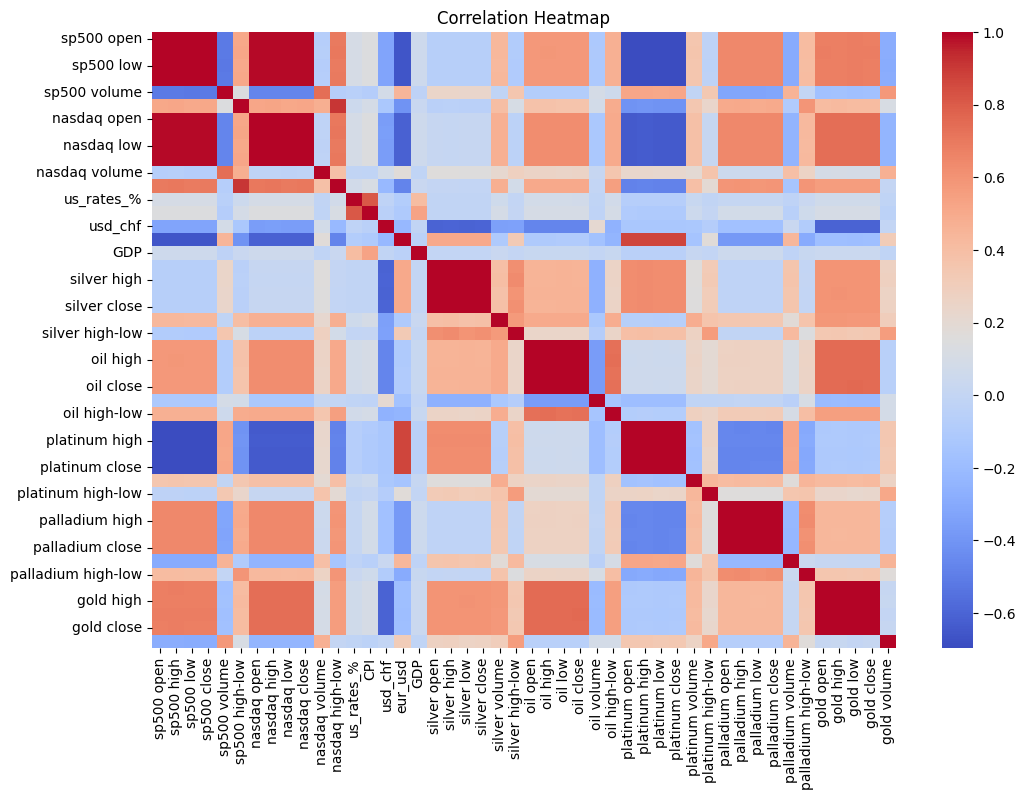

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [17]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(
    n_neighbors=5,
    weights='distance',
    metric='minkowski'
)

knn.fit(X_train_scaled, y_train)


,n_neighbors,5
,weights,'distance'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [18]:
y_pred = knn.predict(X_test_scaled)


In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R² Score:", r2)


Mean Squared Error (MSE): 42.797200921133914
Mean Absolute Error (MAE): 4.3092040486030365
R² Score: 0.9969595414764266


In [21]:
results = {
    "MSE": mse,
    "MAE": mae,
    "R2 Score": r2
}

pd.DataFrame(results, index=["KNN Regression"])


,MSE,MAE,R2 Score
KNN Regression,42.797201,4.309204,0.99696


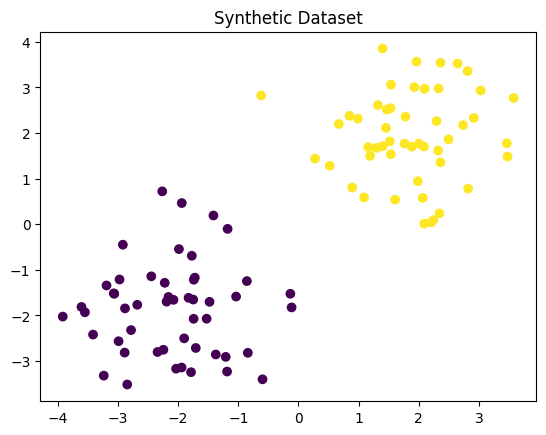

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# Class +1
X1 = np.random.randn(50, 2) + [2, 2]
y1 = np.ones(50)

# Class -1
X2 = np.random.randn(50, 2) + [-2, -2]
y2 = -np.ones(50)

X = np.vstack((X1, X2))
y = np.hstack((y1, y2))

plt.scatter(X[:,0], X[:,1], c=y)
plt.title("Synthetic Dataset")
plt.show()


In [2]:
w = np.zeros(X.shape[1])
b = 0
lr = 0.001
lambda_param = 0.01
epochs = 1000


In [3]:
for _ in range(epochs):
    for i in range(len(X)):
        condition = y[i] * (np.dot(X[i], w) + b) >= 1
        
        if condition:
            w -= lr * (2 * lambda_param * w)
        else:
            w -= lr * (2 * lambda_param * w - y[i] * X[i])
            b -= lr * y[i]


In [4]:
def svm_predict(X, w, b):
    linear_output = np.dot(X, w) + b
    return np.sign(linear_output)


In [5]:
y_pred = svm_predict(X, w, b)

accuracy = np.mean(y_pred == y)
print("SVM Accuracy:", accuracy)


SVM Accuracy: 0.94


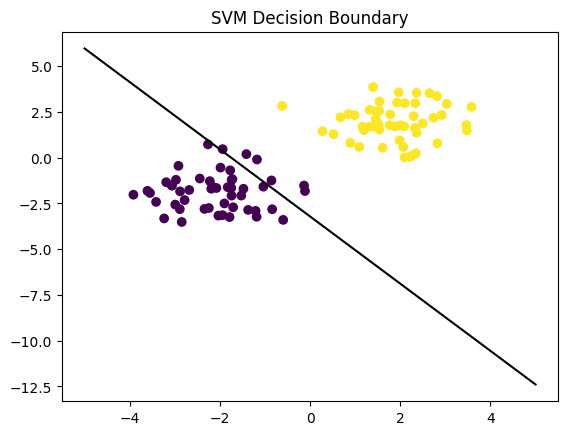

In [6]:
x1 = np.linspace(-5, 5, 100)
x2 = -(w[0]*x1 + b) / w[1]

plt.scatter(X[:,0], X[:,1], c=y)
plt.plot(x1, x2, 'k')
plt.title("SVM Decision Boundary")
plt.show()


In [7]:
import pandas as pd

results = {
    "Model": ["KNN", "SVM"],
    "Metric": ["R2 / Accuracy", "Accuracy"],
    "Score": [0.996, accuracy]
}

pd.DataFrame(results)


,Model,Metric,Score
0,KNN,R2 / Accuracy,0.996
1,SVM,Accuracy,0.940


In [ ]:
# KNN and SVM are implemented from scrach using synthetatic dataset.
# KNN gives high accuracy because data is simple.
# SVM accuracy is bit low because it use linear boundary and gradient decent.
# Both models are working properly.